# Generating Random Curve Data

In [ ]:
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

import locomotion

data = "samples/sample_data/NSS_01.dat" 
# clean up column names and remove quotes from data
df = pd.read_table(data, sep= ',\s+', engine = 'python')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns = df.columns.str.strip().str.lower().str.replace('"', '').str.replace('(', '').str.replace(')', '')
df['image_name']=df['image_name'].str.strip().str.lower().str.replace('"', '').str.replace('(', '').str.replace(')', '')
df['elapsed_time']=df['elapsed_time'].str.strip().str.lower().str.replace('"', '').str.replace('(', '').str.replace(')', '')

In [72]:
# Checking bounds for each column
bounds = df.apply(lambda x: pd.Series([x.min(), x.max()])).T.values.tolist()[1:]
numericalCols = list(df.columns)[1:]

for i in range(len(bounds)):
    print("The minimum and maximum " + str(numericalCols[i]) + " are " + str(bounds[i][0])
          + " and " + str(bounds[i][1]) + ".")

The minimum and maximum elapsed_time are 00:00:00.000 and 00:00:00.159.
The minimum and maximum object_# are 1 and 1.
The minimum and maximum frame_# are 1 and 99.
The minimum and maximum x are 143.94 and 266.796.
The minimum and maximum y are 71.26 and 141.19899999999998.
The minimum and maximum distance are 0.0 and 11.925.
The minimum and maximum time_interval are 0 and 50.
The minimum and maximum velocity are 0.0 and 0.2385.
The minimum and maximum absolute_angle are -155.651 and 172.067.
The minimum and maximum distance_to_origin are 186.14700000000002 and 297.26099999999997.
The minimum and maximum delta_x are -8.58244 and 10.5083.
The minimum and maximum delta_y are -8.3159 and 5.45873.


- Time interval and frame_# are related by $(elapsed time[n] - elapsed time[0])/n$, where $n$ is the number of frames/data
- X and Y are raw inputs
- are the rest all calculated by predefined functions?
- do we want to imitate raw data or smooth data?

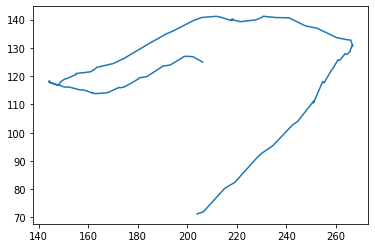

In [97]:
rawX = list(df['x'])
rawY = list(df['y'])

plt.plot(rawX, rawY)

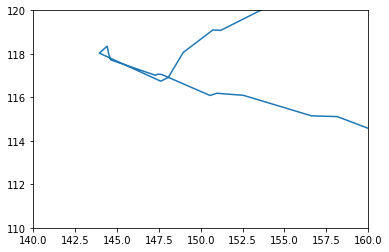

In [98]:
# Let's zoom in a bit 
def plotWithBounds (x1, x2, y1, y2, x, y):
    plt.plot(x,y)
    plt.axis([x1, x2, y1, y2])
    
plotWithBounds(140, 160, 110, 120, rawX, rawY)

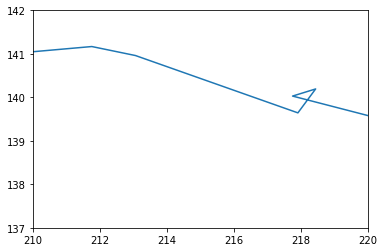

In [99]:
plotWithBounds(210, 220, 137, 142, rawX, rawY)

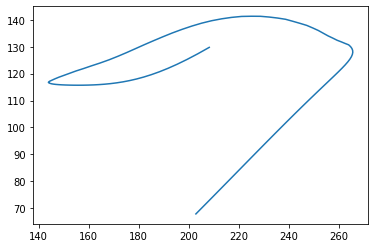

In [102]:
def smooth(X):
    """ Smoothes the sequence X by applying Savitzky-Golay smoothing
    :Parameters:
     X : list
    :Return:
     sX : list
    """
    SMOOTH_RANGE = 53
    ORDER = 5
    sX = savgol_filter(X,SMOOTH_RANGE,ORDER)
    return sX

smoothX = smooth(x)
smoothY = smooth(y)

plt.plot(smoothX, smoothY)

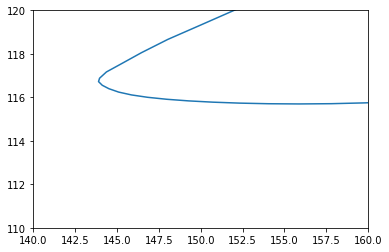

In [103]:
plotWithBounds(140, 160, 110, 120, smoothX, smoothY)

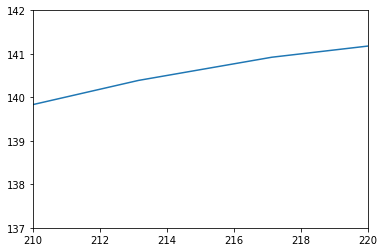

In [104]:
plotWithBounds(210, 220, 137, 142, smoothX, smoothY)

# Simplest idea: Create paths using the filter and random coordinates

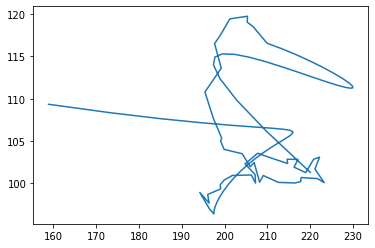

In [118]:
boundsX = bounds[3]
boundsY = bounds[4]

randX = np.random.uniform(boundsX[0], boundsX[1], size=(1, df.shape[0]))
randY = np.random.uniform(boundsY[0], boundsY[1], size=(1, df.shape[0]))

randX = smooth(randX)[0]
randY = smooth(randY)[0]
plt.plot(randX, randY)

# hahahahahahahhahahahahaa
### How do we get more "animal-like" paths? Limit the number of turning points?
Depends on what kinds of animals as well...?

https://academic.oup.com/icb/article/52/5/553/683544

https://en.wikipedia.org/wiki/Animal_locomotion

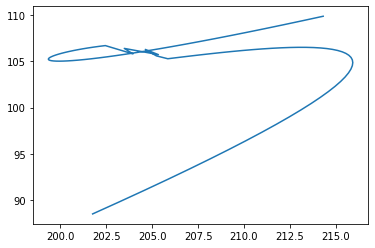

In [133]:
randX = np.random.uniform(boundsX[0], boundsX[1], size=(1, df.shape[0]))
randY = np.random.uniform(boundsY[0], boundsY[1], size=(1, df.shape[0]))

randX = savgol_filter(randX, 93, 3)[0]
randY = savgol_filter(randY, 93, 3)[0]
plt.plot(randX, randY)

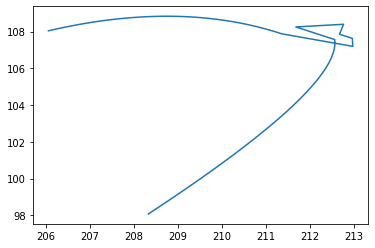

In [135]:
randX = np.random.uniform(boundsX[0], boundsX[1], size=(1, df.shape[0]))
randY = np.random.uniform(boundsY[0], boundsY[1], size=(1, df.shape[0]))

randX = savgol_filter(randX, 93, 2)[0]
randY = savgol_filter(randY, 93, 2)[0]
plt.plot(randX, randY)

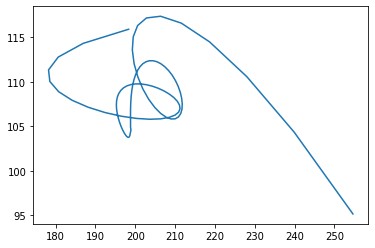

In [140]:
randX = np.random.uniform(boundsX[0], boundsX[1], size=(1, df.shape[0]))
randY = np.random.uniform(boundsY[0], boundsY[1], size=(1, df.shape[0]))

randX = savgol_filter(randX, 99, 9)[0]
randY = savgol_filter(randY, 99, 9)[0]
plt.plot(randX, randY)

In [ ]:
randX = np.random.uniform(boundsX[0], boundsX[1], size=(1, df.shape[0]))
randY = np.random.uniform(boundsY[0], boundsY[1], size=(1, df.shape[0]))

randX = savgol_filter(randX, 99, 7)[0]
randY = savgol_filter(randY, 99, 7)[0]
plt.plot(randX, randY)

# Create curves with closed formula given a range of curvatures and velocities
# Given small n (5) 
# partition into piecewise cubic spline (to fit to only curvature)

# look up inbuilt cubic spline function 

# Adding Noise

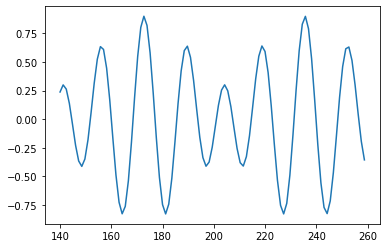

In [226]:
a = 0.4
b = 0.3
alpha = 0.6
beta = 0.3
t = np.arange(140, 260, (260-140)/ 99)

noise = alpha*np.cos(a*t) + beta*np.sin(b*t)
plt.plot(t, noise)


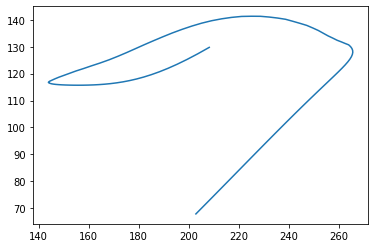

In [224]:
plt.plot(smoothX, smoothY)

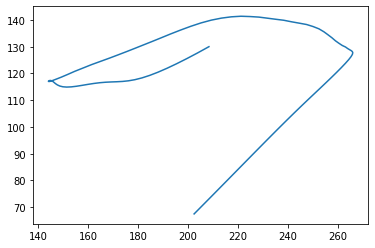

In [227]:
# add noise
plt.plot(smoothX + noise, smoothY + noise)

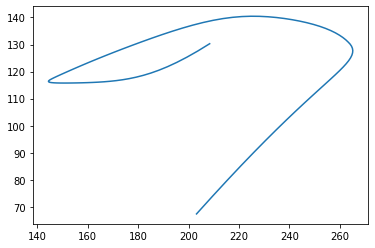

In [232]:
# smooth again
plt.plot(smooth(smoothX + noise), smooth(smoothY + noise))

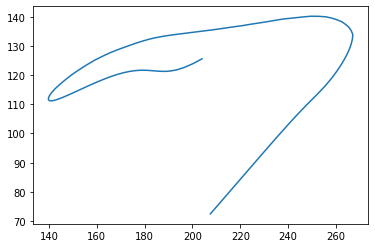

In [248]:
# big ugly noise
a = 5
b = 5
alpha = 5
beta = 5
t = np.arange(140, 260, (260-140)/ 99)
# alphaCos(at), bsing(bt) (along the curve) tweak magnitude and period

noise = alpha*np.cos(a*t) 

plt.plot(smoothX + noise, smoothY + noise)

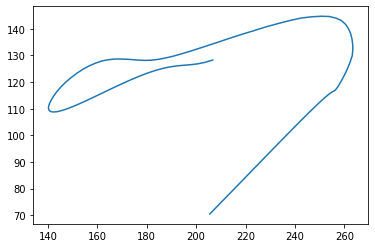

In [247]:
# big ugly noise
a = 5
b = 5
alpha = 5
beta = 5
t = np.arange(140, 260, (260-140)/ 99)
# alphaCos(at), bsing(bt) (along the curve) tweak magnitude and period

noise = alpha*np.cos(a*t) +beta*np.sin(b*t)

plt.plot(smoothX + noise, smoothY + noise)